In [92]:
import pandas as pd
import plotly.express as px
import matplotlib.pylab as plt
import math

In [93]:
character_list = pd.read_csv('character_list5.csv', encoding = "ISO-8859-1")
character_mapping = pd.read_csv('character_mapping.csv', encoding = "ISO-8859-1")
meta_data = pd.read_csv('meta_data7.csv', encoding = "ISO-8859-1")
list_mapping = character_list.merge(character_mapping, how='left', on='script_id')
mapping_meta = character_mapping.merge(meta_data, how='left', on='imdb_id')
list_meta = character_list.merge(meta_data, how='left', on='script_id')

In [94]:
character_list.head()

,script_id,imdb_character_name,words,gender,age
0,280,betty,311,f,35.0
1,280,carolyn johnson,873,f,NaN
2,280,eleanor,138,f,NaN
3,280,francesca johns,2251,f,46.0
4,280,madge,190,f,46.0


In [95]:
character_mapping.head()

,script_id,imdb_id,character_from_script,closest_character_name_from_imdb_match,closest_imdb_character_id
0,1,tt0147800,bianca,bianca stratford,nm0646351
1,1,tt0147800,cameron,cameron james,nm0330687
2,1,tt0147800,chastity,chastity,nm0005517
3,1,tt0147800,joey,joey donner,nm0005080
4,1,tt0147800,kat,kat stratford,nm0005466


In [96]:
meta_data.head()

,script_id,imdb_id,title,year,gross,lines_data
0,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774774443342577775657744434444564456...
1,1512,tt0147800,10 Things I Hate About You,1999,65.0,1777752320274533344457777722433777334443764677...
2,1514,tt0417385,12 and Holding,2005,NaN,5461357777754212454544441367774433446547647753...
3,1517,tt2024544,12 Years a Slave,2013,60.0,4567334777777777777777447777756477777444777777...
4,1520,tt1542344,127 Hours,2010,20.0,453513352345765766777777773340


In [97]:
list_mapping.head()

,script_id,imdb_character_name,words,gender,age,imdb_id,character_from_script,closest_character_name_from_imdb_match,closest_imdb_character_id
0,280,betty,311,f,35.0,tt0112579,betty,betty,nm0529137
1,280,betty,311,f,35.0,tt0112579,carolyn,carolyn johnson,nm0179960
2,280,betty,311,f,35.0,tt0112579,francesca,francesca johnson,nm0000658
3,280,betty,311,f,35.0,tt0112579,lawyer,lawyer peterson,nm0481189
4,280,betty,311,f,35.0,tt0112579,madge,madge,nm0598213


In [98]:
mapping_meta.head()

,script_id_x,imdb_id,character_from_script,closest_character_name_from_imdb_match,closest_imdb_character_id,script_id_y,title,year,gross,lines_data
0,1,tt0147800,bianca,bianca stratford,nm0646351,1512.0,10 Things I Hate About You,1999.0,65.0,1777752320274533344457777722433777334443764677...
1,1,tt0147800,cameron,cameron james,nm0330687,1512.0,10 Things I Hate About You,1999.0,65.0,1777752320274533344457777722433777334443764677...
2,1,tt0147800,chastity,chastity,nm0005517,1512.0,10 Things I Hate About You,1999.0,65.0,1777752320274533344457777722433777334443764677...
3,1,tt0147800,joey,joey donner,nm0005080,1512.0,10 Things I Hate About You,1999.0,65.0,1777752320274533344457777722433777334443764677...
4,1,tt0147800,kat,kat stratford,nm0005466,1512.0,10 Things I Hate About You,1999.0,65.0,1777752320274533344457777722433777334443764677...


In [99]:
Dict1 = {}
for i in range(1929, 2016):
    query_string = "year == " + str(i)
    counts = mapping_meta.query(query_string).shape[0]
    Dict1[i] = counts
print(Dict1)

{1929: 7, 1930: 0, 1931: 39, 1932: 186, 1933: 50, 1934: 63, 1935: 0, 1936: 154, 1937: 52, 1938: 0, 1939: 249, 1940: 219, 1941: 252, 1942: 0, 1943: 84, 1944: 76, 1945: 46, 1946: 155, 1947: 35, 1948: 129, 1949: 104, 1950: 48, 1951: 0, 1952: 0, 1953: 98, 1954: 184, 1955: 21, 1956: 183, 1957: 163, 1958: 67, 1959: 184, 1960: 252, 1961: 51, 1962: 0, 1963: 76, 1964: 33, 1965: 45, 1966: 75, 1967: 128, 1968: 75, 1969: 110, 1970: 298, 1971: 465, 1972: 322, 1973: 539, 1974: 441, 1975: 694, 1976: 532, 1977: 281, 1978: 358, 1979: 663, 1980: 937, 1981: 462, 1982: 1160, 1983: 617, 1984: 1184, 1985: 832, 1986: 1152, 1987: 1320, 1988: 1306, 1989: 1830, 1990: 1659, 1991: 1797, 1992: 2290, 1993: 2445, 1994: 2265, 1995: 3292, 1996: 2639, 1997: 4342, 1998: 3416, 1999: 5030, 2000: 4315, 2001: 3588, 2002: 2780, 2003: 2202, 2004: 2572, 2005: 2873, 2006: 2347, 2007: 2481, 2008: 3066, 2009: 3842, 2010: 3003, 2011: 2883, 2012: 2996, 2013: 2846, 2014: 2324, 2015: 1718}


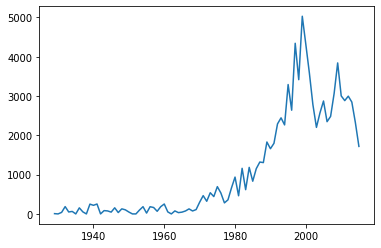

In [100]:
tmp = sorted(Dict1.items()) 
x, y = zip(*tmp)
plt.plot(x, y)
plt.show()

In [101]:
list_meta.head()

,script_id,imdb_character_name,words,gender,age,imdb_id,title,year,gross,lines_data
0,280,betty,311,f,35.0,tt0112579,The Bridges of Madison County,1995,142.0,4332023434343443203433434334433434343434434344...
1,280,carolyn johnson,873,f,NaN,tt0112579,The Bridges of Madison County,1995,142.0,4332023434343443203433434334433434343434434344...
2,280,eleanor,138,f,NaN,tt0112579,The Bridges of Madison County,1995,142.0,4332023434343443203433434334433434343434434344...
3,280,francesca johns,2251,f,46.0,tt0112579,The Bridges of Madison County,1995,142.0,4332023434343443203433434334433434343434434344...
4,280,madge,190,f,46.0,tt0112579,The Bridges of Madison County,1995,142.0,4332023434343443203433434334433434343434434344...


In [102]:
Dict2 = {}
for i in range(1929, 2016):
    query_string = "year == " + str(i)
    counts = (list_meta.query(query_string))['words'].sum()
    Dict2[i] = counts
print(Dict2)

{1929: 8572, 1930: 0, 1931: 11601, 1932: 67534, 1933: 21125, 1934: 24646, 1935: 0, 1936: 32380, 1937: 26192, 1938: 0, 1939: 45109, 1940: 40977, 1941: 56795, 1942: 0, 1943: 28861, 1944: 32208, 1945: 29230, 1946: 13678, 1947: 7688, 1948: 43830, 1949: 23440, 1950: 12149, 1951: 6399, 1952: 0, 1953: 31074, 1954: 52272, 1955: 18280, 1956: 35286, 1957: 40979, 1958: 14896, 1959: 44422, 1960: 56698, 1961: 18600, 1962: 0, 1963: 21996, 1964: 4895, 1965: 12780, 1966: 27648, 1967: 58485, 1968: 17918, 1969: 22244, 1970: 72693, 1971: 112442, 1972: 70358, 1973: 71312, 1974: 61713, 1975: 129884, 1976: 86732, 1977: 62871, 1978: 60174, 1979: 155487, 1980: 211444, 1981: 102710, 1982: 215358, 1983: 137266, 1984: 159963, 1985: 195535, 1986: 205862, 1987: 281291, 1988: 220812, 1989: 371167, 1990: 317887, 1991: 419962, 1992: 432379, 1993: 451761, 1994: 420542, 1995: 666427, 1996: 534001, 1997: 720235, 1998: 807564, 1999: 1028874, 2000: 748856, 2001: 692483, 2002: 496577, 2003: 492354, 2004: 567967, 2005: 7021

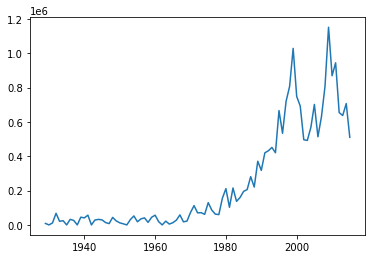

In [103]:
tmp = sorted(Dict2.items()) 
x, y = zip(*tmp)
plt.plot(x, y)
plt.show()

In [104]:
gross_values = list_meta.gross.tolist()
gross_values = list(dict.fromkeys(gross_values))
gross_values = [x for x in gross_values if math.isnan(x) == False]
Dict3 = {}
for i in gross_values:
    query_string = "gross == " + str(i)
    counts = (list_meta.query(query_string))['words'].sum()
    Dict3[i] = counts
print(Dict3)

{142.0: 19225, 37.0: 142648, 376.0: 4401, 19.0: 136425, 10.0: 143745, 40.0: 185529, 327.0: 6171, 269.0: 5484, 53.0: 75114, 89.0: 58693, 164.0: 25713, 565.0: 9874, 110.0: 22677, 48.0: 220790, 152.0: 17516, 1.0: 360362, 102.0: 39416, 351.0: 4434, 107.0: 57153, 99.0: 40687, 131.0: 48631, 4.0: 201340, 3.0: 201405, 12.0: 199038, 247.0: 15058, 341.0: 12895, 550.0: 3751, 64.0: 158293, 124.0: 3497, 95.0: 54018, 29.0: 86637, 27.0: 227698, 255.0: 13929, 32.0: 183828, 73.0: 58643, 151.0: 17302, 24.0: 87890, 28.0: 83638, 138.0: 14101, 350.0: 25951, 377.0: 5823, 56.0: 77109, 44.0: 171107, 43.0: 56280, 98.0: 39716, 30.0: 104947, 2.0: 336603, 59.0: 54833, 191.0: 24434, 49.0: 129219, 35.0: 94758, 5.0: 231218, 34.0: 174167, 60.0: 138619, 101.0: 66922, 79.0: 46416, 18.0: 202354, 72.0: 54554, 70.0: 37987, 116.0: 35322, 122.0: 101443, 20.0: 205546, 135.0: 42978, 212.0: 41908, 120.0: 38840, 63.0: 89525, 86.0: 31197, 114.0: 17224, 686.0: 9090, 31.0: 154757, 174.0: 37423, 91.0: 59696, 23.0: 192135, 85.0: 111

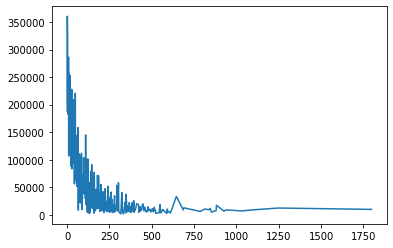

In [105]:
tmp = sorted(Dict3.items()) 
x, y = zip(*tmp)
plt.plot(x, y)
plt.show()